In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os,sys
import scipy.integrate as spi
import matplotlib

CURRENT_DIR = os.getcwd()
module_path = os.path.abspath(os.path.join(CURRENT_DIR, "../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

from Anydim_transferability.GNN_size_generalizability.model import GNN
from Anydim_transferability.GNN_size_generalizability import color_dict
from Anydim_transferability import typesetting
typesetting()

[ 10  15  25  39  63  99 158 251 398 630]


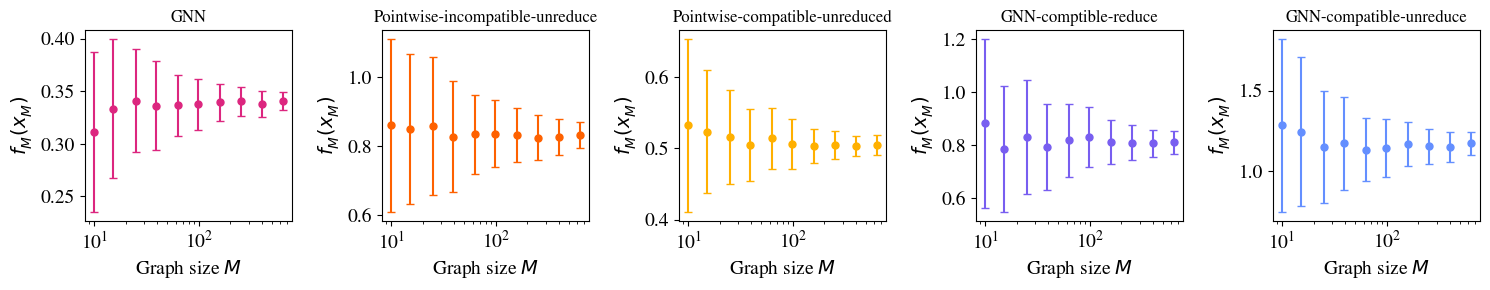

In [6]:
def generate_ER(N, n):
    p = 1 / 2
    adj_matrix = np.random.binomial(1, p, (N, n, n))
    adj_matrix = np.triu(adj_matrix, 0) + np.triu(adj_matrix, 1).transpose(0, 2, 1)
    x = np.random.normal(0, 1, (N, n, 1))
    # x = np.ones((N, n, 1))
    return adj_matrix, x


n_samples = 100
log_n_range = np.arange(1, 3, 0.2)
# for _ in range(5):
# fix 3 models with random weights
gnn_simple = GNN(in_channels=1, out_channels=1, hidden_channels=1, num_layers = 1, model = "simple")
ptwise_compatible = GNN(in_channels=1, out_channels=1, hidden_channels=1, num_layers = 1, model = "ign_anydim")
ptwise_incompatible = GNN(in_channels=1, out_channels=1, hidden_channels=1, num_layers = 1, model = "ign")
gnn_reduced = GNN(in_channels=1, out_channels=1, hidden_channels=1, num_layers = 1, model = "reduced")
gnn_unreduced = GNN(in_channels=1, out_channels=1, hidden_channels=1, num_layers = 1, model = "unreduced")

# compute output
n_range = np.power(10, log_n_range).astype(int)
print(n_range)
models = {
    "GNN": gnn_simple,
    "Pointwise-incompatible-unreduce": ptwise_incompatible,
    "Pointwise-compatible-unreduced": ptwise_compatible,
    "GNN-comptible-reduce": gnn_reduced,
    "GNN-compatible-unreduce": gnn_unreduced,
}
outputs = {}
for model_name, model in models.items():
    model.eval()
    outputs.setdefault(model_name, [])
    for i, n in enumerate(n_range):
        A, X = generate_ER(n_samples, n)
        A = torch.FloatTensor(A)
        X = torch.FloatTensor(X)
        with torch.no_grad():
            output = model(A, X)
            outputs[model_name].append(output)

# plot
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for ax, (model_name, color) in zip(axs, color_dict.items()):
    norms_of_outputs = [
        torch.norm(outputs[model_name][i].squeeze(), dim=-1) / np.sqrt(n)
        for i, n in enumerate(n_range)
    ]
    ax.errorbar(
        n_range,
        [norms_of_outputs[i].mean() for i in range(len(n_range))],
        [norms_of_outputs[i].std() for i in range(len(n_range))],
        fmt="o",
        capsize=3,
        markersize=5,
        color=color,
    )
    ax.set_xscale("log")
    ax.set_xlabel("Graph size $M$", fontsize=14)
    ax.set_ylabel("$f_M(x_M)$", fontsize=14)
    ax.set_title(model_name, fontsize=12)
    ax.tick_params(axis="both", which="major", labelsize=14)

plt.tight_layout()
plt.savefig(CURRENT_DIR + "/log/transferability/gnn_transferability_outputs.png")
plt.savefig(CURRENT_DIR + "/log/transferability/gnn_transferability_outputs.pdf")
plt.show()

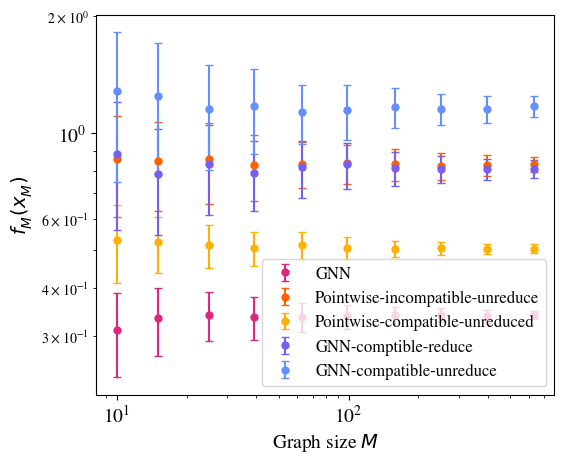

In [7]:
fig, ax = plt.subplots(figsize=(6, 5))

for model_name, color in color_dict.items():
    norms_of_outputs = [
        torch.norm(outputs[model_name][i].squeeze(), dim=-1) / np.sqrt(n)
        for i, n in enumerate(n_range)
    ]
    ax.errorbar(
        n_range,
        [norms_of_outputs[i].mean() for i in range(len(n_range))],
        [norms_of_outputs[i].std() for i in range(len(n_range))],
        fmt="o",
        capsize=3,
        markersize=5,
        color=color,
        label=model_name,
    )

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Graph size $M$", fontsize=14)
ax.set_ylabel("$f_M(x_M)$", fontsize=14)
ax.legend(fontsize=12, loc = "lower right")
ax.tick_params(axis="both", which="major", labelsize=14)

plt.tight_layout(pad=2.0)
plt.savefig(CURRENT_DIR + "/log/transferability/gnn_transferability_outputs_combined.png")
plt.savefig(CURRENT_DIR + "/log/transferability/gnn_transferability_outputs_combined.pdf")
plt.show()

[ 10  15  25  39  63  99 158 251 398 630]


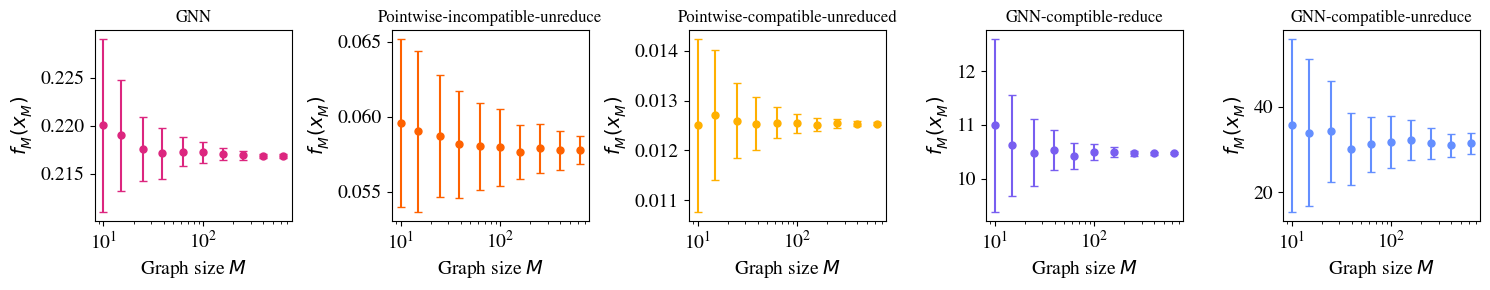

[ 10  15  25  39  63  99 158 251 398 630]


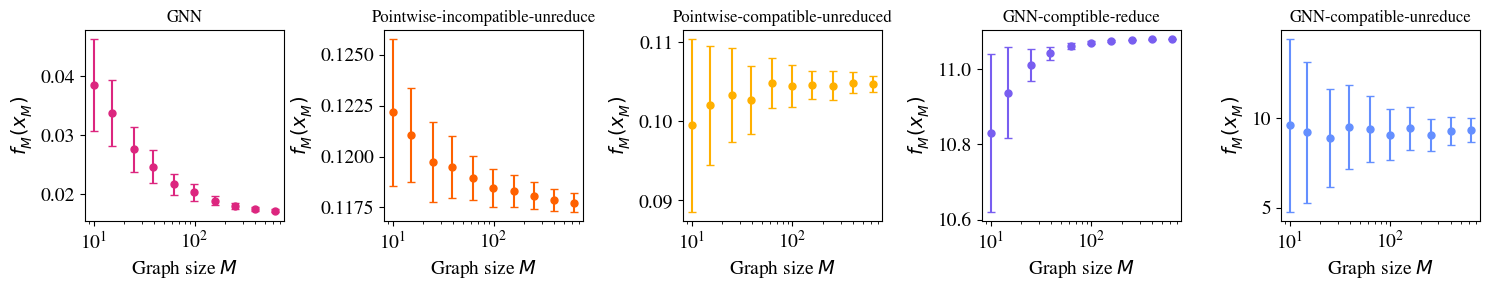

[ 10  15  25  39  63  99 158 251 398 630]


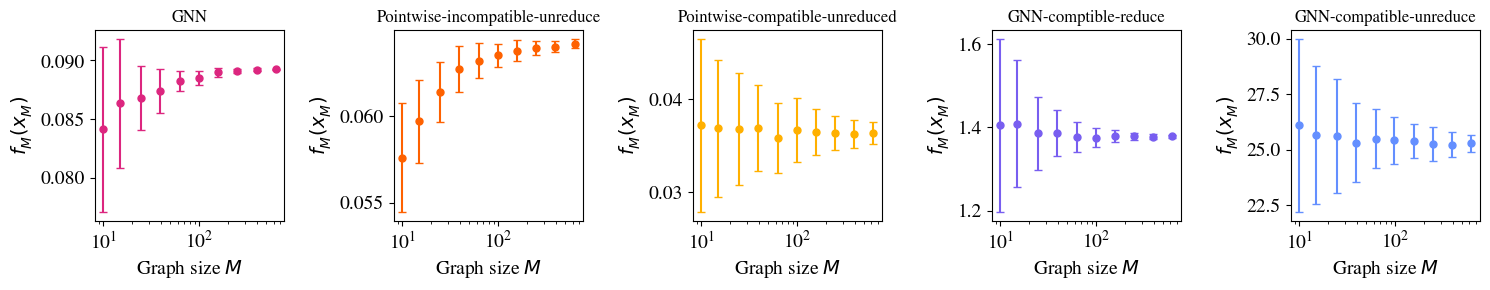

[ 10  15  25  39  63  99 158 251 398 630]


In [8]:
def generate_ER(N, n):
    p = 1 / 2
    adj_matrix = np.random.binomial(1, p, (N, n, n))
    adj_matrix = np.triu(adj_matrix, 0) + np.triu(adj_matrix, 1).transpose(0, 2, 1)
    # gaussian = np.random.normal(0, 1, (N, n, 1))
    x = np.ones((N, n, 1))
    return adj_matrix, x



n_samples = 100
log_n_range = np.arange(1, 3, 0.2)
for _ in range(5):
    # fix 3 models with random weights
    gnn_simple = GNN(in_channels=1, out_channels=1, hidden_channels=10, num_layers=3, model="simple")
    ptwise_compatible = GNN(
        in_channels=1, out_channels=1, hidden_channels=10, num_layers=3, model="ign_anydim"
    )
    ptwise_incompatible = GNN(
        in_channels=1, out_channels=1, hidden_channels=10, num_layers=3, model="ign"
    )
    gnn_reduced = GNN(
        in_channels=1, out_channels=1, hidden_channels=10, num_layers=3, model="reduced"
    )
    gnn_unreduced = GNN(
        in_channels=1, out_channels=1, hidden_channels=10, num_layers=3, model="unreduced"
    )

    # compute output
    n_range = np.power(10, log_n_range).astype(int)
    print(n_range)
    models = {
        "GNN": gnn_simple,
        "Pointwise-incompatible-unreduce": ptwise_incompatible,
        "Pointwise-compatible-unreduced": ptwise_compatible,
        "GNN-comptible-reduce": gnn_reduced,
        "GNN-compatible-unreduce": gnn_unreduced,
    }
    outputs = {}
    for model_name, model in models.items():
        model.eval()
        outputs.setdefault(model_name, [])
        for i, n in enumerate(n_range):
            A, X = generate_ER(n_samples, n)
            A = torch.FloatTensor(A)
            X = torch.FloatTensor(X)
            with torch.no_grad():
                output = model(A, X)
                outputs[model_name].append(output)

    # plot
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    for ax, (model_name, color) in zip(axs, color_dict.items()):
        norms_of_outputs = [
            torch.norm(outputs[model_name][i].squeeze(), dim=-1) / np.sqrt(n)
            for i, n in enumerate(n_range)
        ]
        ax.errorbar(
            n_range,
            [norms_of_outputs[i].mean() for i in range(len(n_range))],
            [norms_of_outputs[i].std() for i in range(len(n_range))],
            fmt="o",
            capsize=3,
            markersize=5,
            color=color,
        )
        ax.set_xscale("log")
        ax.set_xlabel("Graph size $M$", fontsize=14)
        ax.set_ylabel("$f_M(x_M)$", fontsize=14)
        ax.set_title(model_name, fontsize=12)
        ax.tick_params(axis="both", which="major", labelsize=14)

    plt.tight_layout()
    # plt.savefig(CURRENT_DIR + "/log/transferability/gnn_transferability_outputs.png")
    # plt.savefig(CURRENT_DIR + "/log/transferability/gnn_transferability_outputs.pdf")
    plt.show()

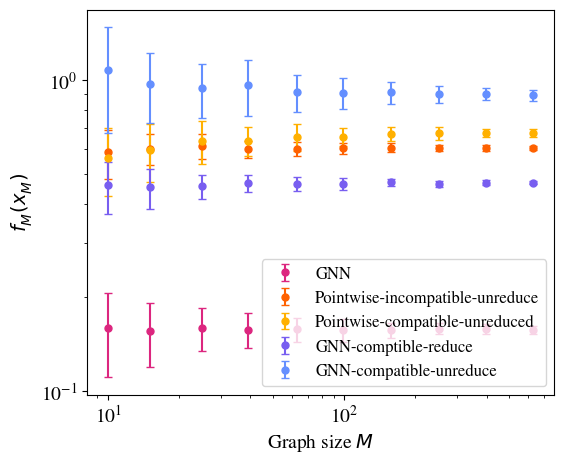

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))

for model_name, color in color_dict.items():
    norms_of_outputs = [
        torch.norm(outputs[model_name][i].squeeze(), dim=-1) / np.sqrt(n)
        for i, n in enumerate(n_range)
    ]
    ax.errorbar(
        n_range,
        [norms_of_outputs[i].mean() for i in range(len(n_range))],
        [norms_of_outputs[i].std() for i in range(len(n_range))],
        fmt="o",
        capsize=3,
        markersize=5,
        color=color,
        label=model_name,
    )

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Graph size $M$", fontsize=14)
ax.set_ylabel("$f_M(x_M)$", fontsize=14)
ax.legend(fontsize=12, loc="lower right")
ax.tick_params(axis="both", which="major", labelsize=14)

plt.tight_layout(pad=2.0)
plt.savefig(CURRENT_DIR + "/log/transferability/gnn_transferability_outputs_combined.png")
plt.savefig(CURRENT_DIR + "/log/transferability/gnn_transferability_outputs_combined.pdf")
plt.show()